<a href="https://colab.research.google.com/github/0xemrekara/brent-cpi-analysis/blob/main/BRENT_CPI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           Date  BRENT PRICE (USD)    TUFE  USDTRY
0  Jan 01, 2005              45.92  114.49   13355
1  Feb 01, 2005              50.06  114.51   12830
2  Mar 01, 2005              54.29  114.81   13525
3  Apr 01, 2005              51.09  115.63   13915
4  May 01, 2005              50.73  116.69   13645
Index(['Date', 'BRENT PRICE (USD)', 'TUFE', 'USDTRY'], dtype='object')
BRENT PRICE (USD)    0
TUFE                 0
USDTRY               0
dtype: int64
            BRENT PRICE (USD)    TUFE  USDTRY
Date                                         
2005-01-01              45.92  114.49   13355
2005-02-01              50.06  114.51   12830
2005-03-01              54.29  114.81   13525
2005-04-01              51.09  115.63   13915
2005-05-01              50.73  116.69   13645
Correlation between Brent Price (USD) and TUFE: 0.04296763917477026
ADF Test for Brent Price (USD)
ADF Statistic: -3.039113924864005
p-value: 0.03139961206797505
Critical Values: {'1%': -3.4582467982399105, '5%': -2.873

<ipython-input-1-37676466231e>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TUFE_diff2'] = data['TUFE'].diff().diff()


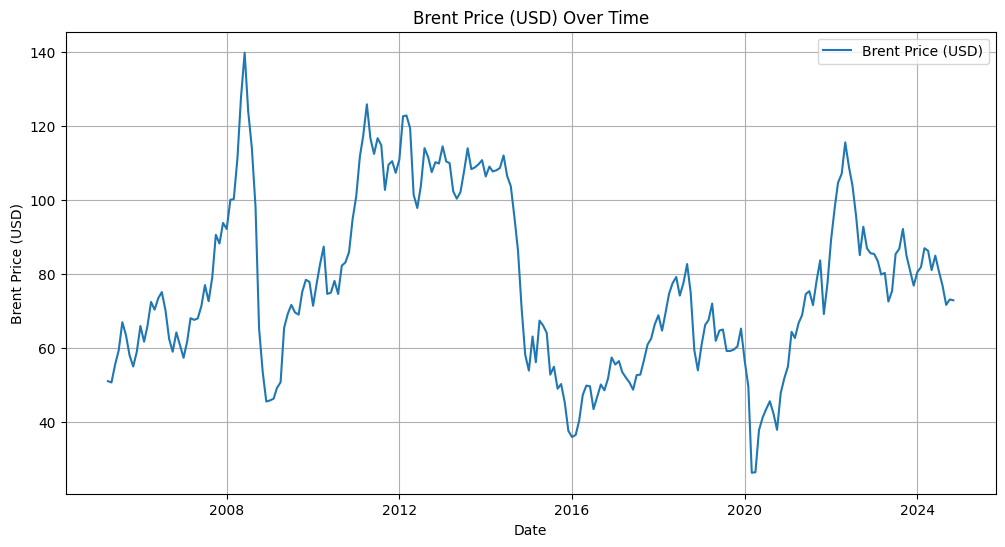

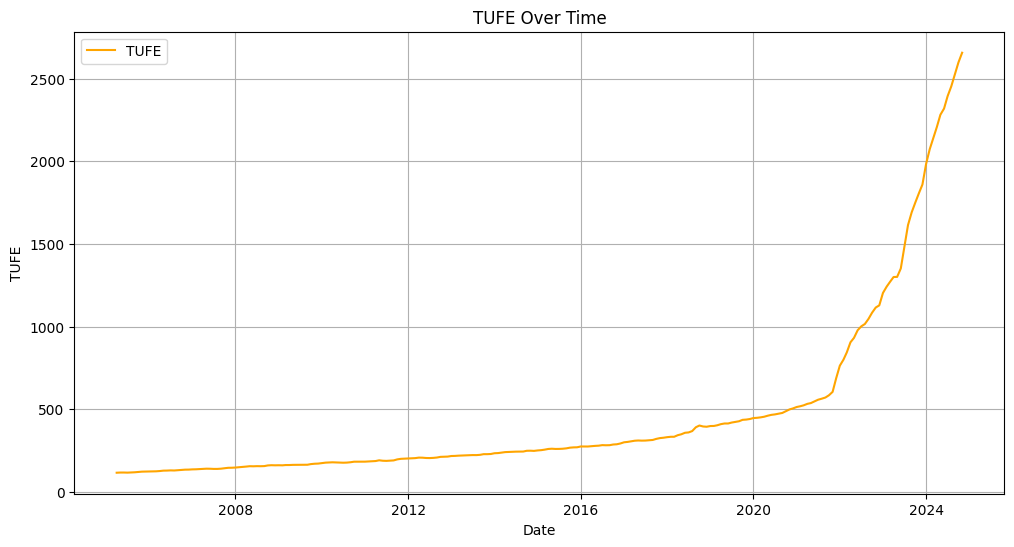

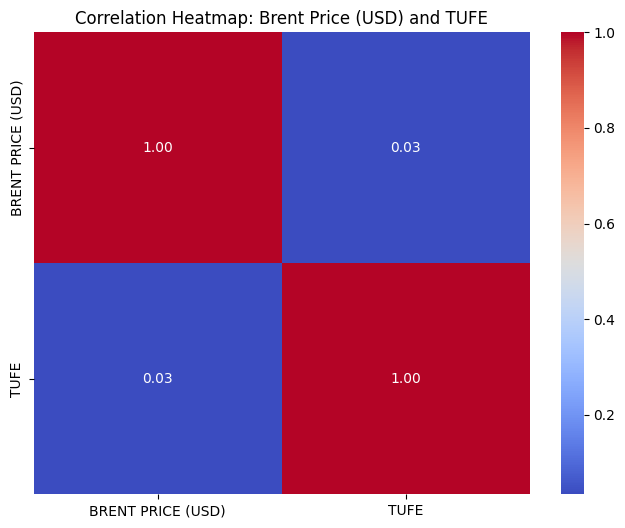

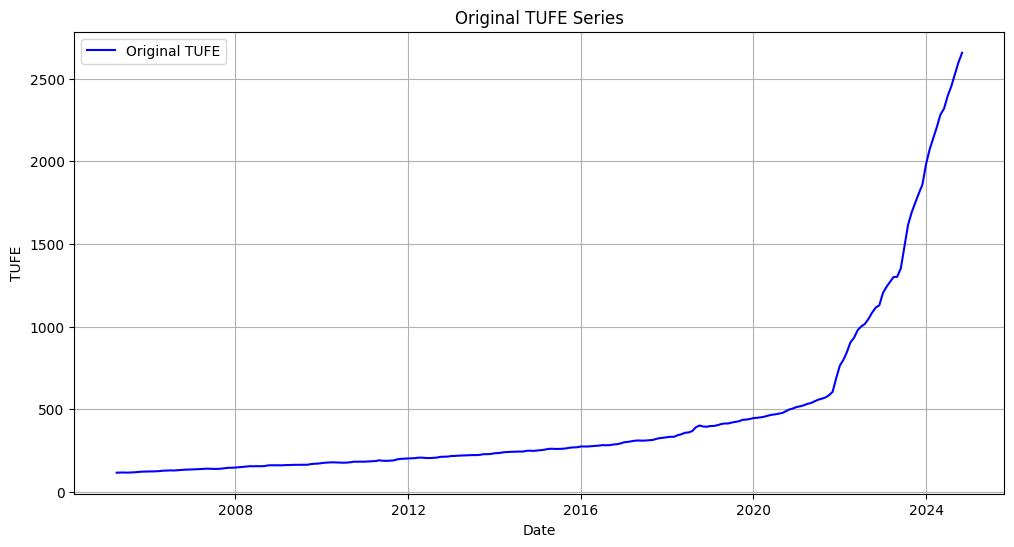

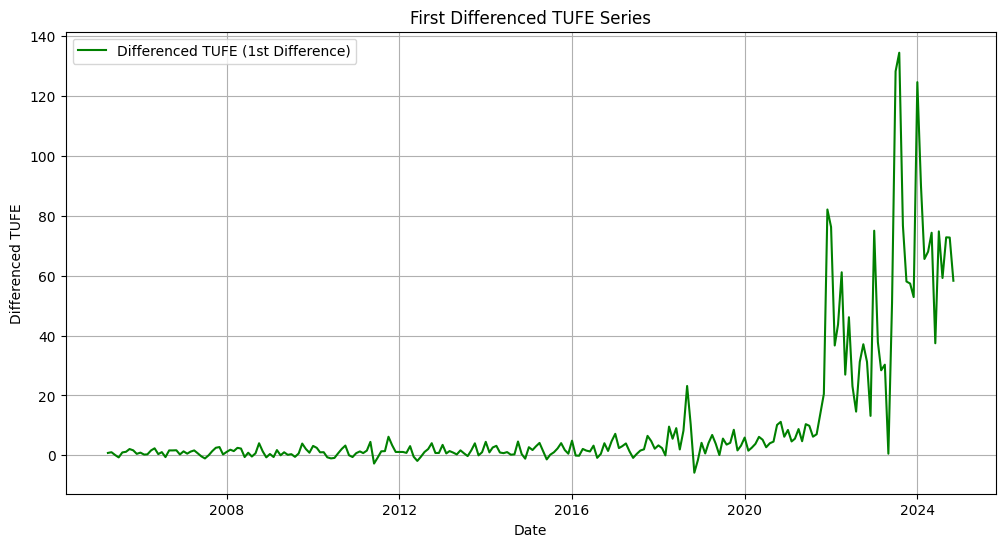

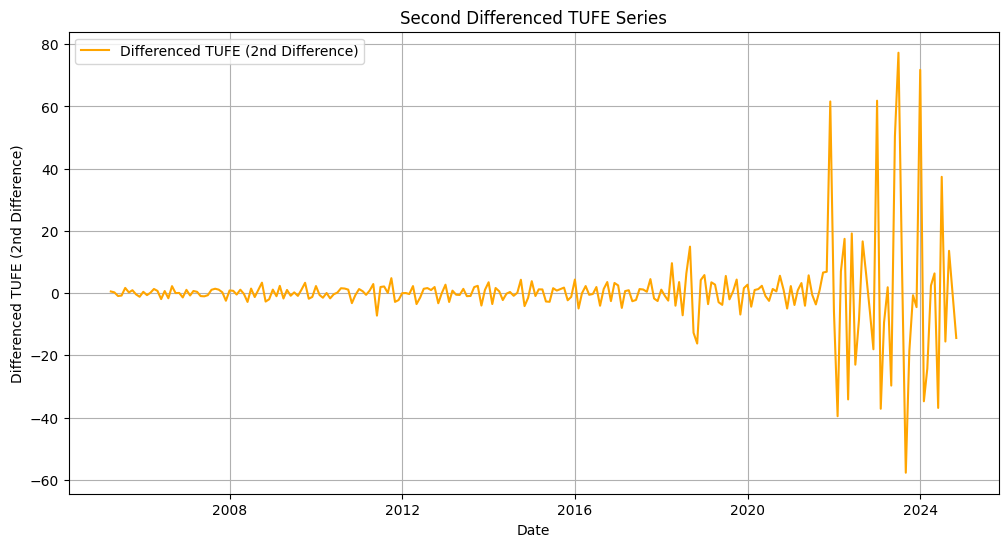

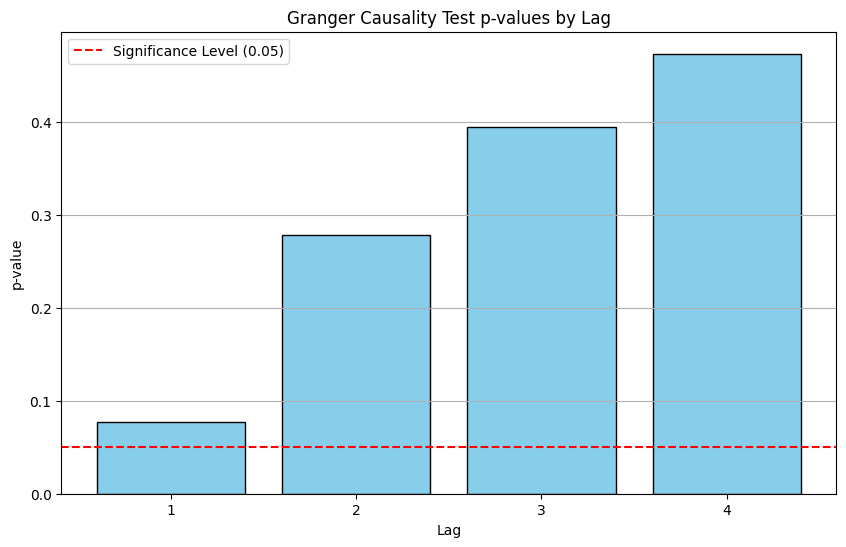

In [1]:
# @title USD BASED CALCULATIONS


# 1.Data Loading and Initial Inspection | Based on USD

# Import necessary library
import pandas as pd

# Load the Excel file into a Pandas DataFrame
data = pd.read_excel("BRENT_TUFE_DATA.xlsx")

# Display the first few rows of the dataset to verify the structure
print(data.head())

# Display the column names to ensure correctness
print(data.columns)

# 2.Data Preparation | Based on USD

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Check for missing values in the dataset
print(data.isnull().sum())

# Display the first few rows again to confirm changes
print(data.head())

# 3.Correlation Analysis | BRENT(USD) & TUFE

# Calculate the correlation between 'BRENT PRICE (USD)' and 'TUFE'
correlation = data['BRENT PRICE (USD)'].corr(data['TUFE'])

# Print the correlation value
print(f"Correlation between Brent Price (USD) and TUFE: {correlation}")

# 4.Stationarity Check (Augmented Dickey-Fuller Test)

# Import the ADF test function
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test for 'BRENT PRICE (USD)'
adf_brent = adfuller(data['BRENT PRICE (USD)'])
print("ADF Test for Brent Price (USD)")
print(f"ADF Statistic: {adf_brent[0]}")
print(f"p-value: {adf_brent[1]}")
print(f"Critical Values: {adf_brent[4]}")

# Perform the ADF test for 'TUFE'
adf_tufe = adfuller(data['TUFE'])
print("\nADF Test for TUFE")
print(f"ADF Statistic: {adf_tufe[0]}")
print(f"p-value: {adf_tufe[1]}")
print(f"Critical Values: {adf_tufe[4]}")

# 4.TUFE Series Stationary

# Take the first difference of 'TUFE' to make it stationary
data['TUFE_diff'] = data['TUFE'].diff()

# Drop the first NaN value caused by differencing
data = data.dropna()

# Perform the ADF test again for the differenced 'TUFE'
adf_tufe_diff = adfuller(data['TUFE_diff'])
print("\nADF Test for Differenced TUFE")
print(f"ADF Statistic: {adf_tufe_diff[0]}")
print(f"p-value: {adf_tufe_diff[1]}")
print(f"Critical Values: {adf_tufe_diff[4]}")

# 5.Second Differencing for TUFE

# Take the second difference of 'TUFE' to make it stationary
data['TUFE_diff2'] = data['TUFE'].diff().diff()

# Drop NaN values caused by differencing
data = data.dropna()

# Perform the ADF test again for the second differenced 'TUFE'
adf_tufe_diff2 = adfuller(data['TUFE_diff2'])
print("\nADF Test for Second Differenced TUFE")
print(f"ADF Statistic: {adf_tufe_diff2[0]}")
print(f"p-value: {adf_tufe_diff2[1]}")
print(f"Critical Values: {adf_tufe_diff2[4]}")

# 6.Granger Causality Test | Based on USD

# Import the Granger causality test function
from statsmodels.tsa.stattools import grangercausalitytests

# Perform Granger Causality Test with lags from 1 to 4
print("\nGranger Causality Test Results")
grangercausalitytests(data[['BRENT PRICE (USD)', 'TUFE_diff2']], maxlag=4)

# 7. Data Overview

import matplotlib.pyplot as plt

# Plot Brent Price (USD) over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['BRENT PRICE (USD)'], label='Brent Price (USD)')
plt.title("Brent Price (USD) Over Time")
plt.xlabel("Date")
plt.ylabel("Brent Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# Plot TUFE over time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TUFE'], label='TUFE', color='orange')
plt.title("TUFE Over Time")
plt.xlabel("Date")
plt.ylabel("TUFE")
plt.legend()
plt.grid(True)
plt.show()

# 8.Correlation Heatmap

import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data[['BRENT PRICE (USD)', 'TUFE']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Brent Price (USD) and TUFE")
plt.show()

# 9.Time Series Stationarity Visualization

# Plot original TUFE series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TUFE'], label='Original TUFE', color='blue')
plt.title("Original TUFE Series")
plt.xlabel("Date")
plt.ylabel("TUFE")
plt.legend()
plt.grid(True)
plt.show()

# Plot differenced TUFE series (1st difference)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TUFE_diff'], label='Differenced TUFE (1st Difference)', color='green')
plt.title("First Differenced TUFE Series")
plt.xlabel("Date")
plt.ylabel("Differenced TUFE")
plt.legend()
plt.grid(True)
plt.show()

# Plot second differenced TUFE series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['TUFE_diff2'], label='Differenced TUFE (2nd Difference)', color='orange')
plt.title("Second Differenced TUFE Series")
plt.xlabel("Date")
plt.ylabel("Differenced TUFE (2nd Difference)")
plt.legend()
plt.grid(True)
plt.show()

# 10. Granger Causality Visualization

# Import necessary library for visualization
import numpy as np

# Define p-values for each lag from the Granger test results
p_values = [0.0773, 0.2783, 0.3946, 0.4734]  # Example p-values from the test results
lags = [1, 2, 3, 4]  # Lag numbers

# Plot the p-values as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(lags, p_values, color='skyblue', edgecolor='black')
plt.axhline(y=0.05, color='red', linestyle='--', label='Significance Level (0.05)')
plt.title("Granger Causality Test p-values by Lag")
plt.xlabel("Lag")
plt.ylabel("p-value")
plt.xticks(ticks=lags)
plt.legend()
plt.grid(axis='y')
plt.show()



TRY BASED CALCULATIONS


Column Names:
 Index(['Date', 'BRENT PRICE (USD)', 'TUFE', 'USDTRY'], dtype='object')

First 5 Rows:
            Date  BRENT PRICE (USD)    TUFE  USDTRY
0  Jan 01, 2005              45.92  114.49   13355
1  Feb 01, 2005              50.06  114.51   12830
2  Mar 01, 2005              54.29  114.81   13525
3  Apr 01, 2005              51.09  115.63   13915
4  May 01, 2005              50.73  116.69   13645

Transformed Data (First 5 Rows):
         Date  BRENT PRICE (USD)  USDTRY  Brent_Price_Try
0 2005-01-01              45.92   13355        61.326160
1 2005-02-01              50.06   12830        64.226980
2 2005-03-01              54.29   13525        73.427225
3 2005-04-01              51.09   13915        71.091735
4 2005-05-01              50.73   13645        69.221085

Correlation between Brent Price (TRY) and TUFE: 0.9679332080241567

ADF Test for Brent Price (TRY):
ADF Statistic: 2.48996201586367
p-value: 0.9990465420600435
Critical Values: {'1%': -3.459884913337196, '5%': -2.8

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
DEBUG:cmdstanpy:input tempfile: /tmp/tmpow5q9eis/608ukqre.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpow5q9eis/yy18aqp6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39179', 'data', 'file=/tmp/tmpow5q9eis/608ukqre.json', 'init=/tmp/tmpow5q9eis/yy18aqp6.json', 'output', 'file=/tmp/tmpow5q9eis/prophet_model629pzunq/prophet_model-20250102081342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:13:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:13:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

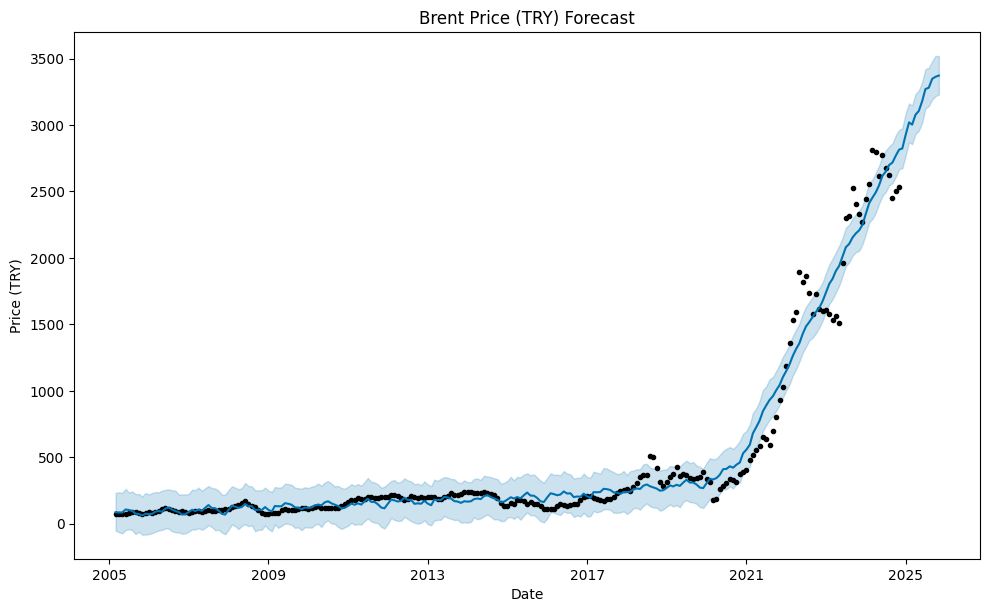

DEBUG:cmdstanpy:input tempfile: /tmp/tmpow5q9eis/8e1y6r6q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpow5q9eis/7ctrf7ml.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66168', 'data', 'file=/tmp/tmpow5q9eis/8e1y6r6q.json', 'init=/tmp/tmpow5q9eis/7ctrf7ml.json', 'output', 'file=/tmp/tmpow5q9eis/prophet_model13gtg4wg/prophet_model-20250102081343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:13:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:13:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

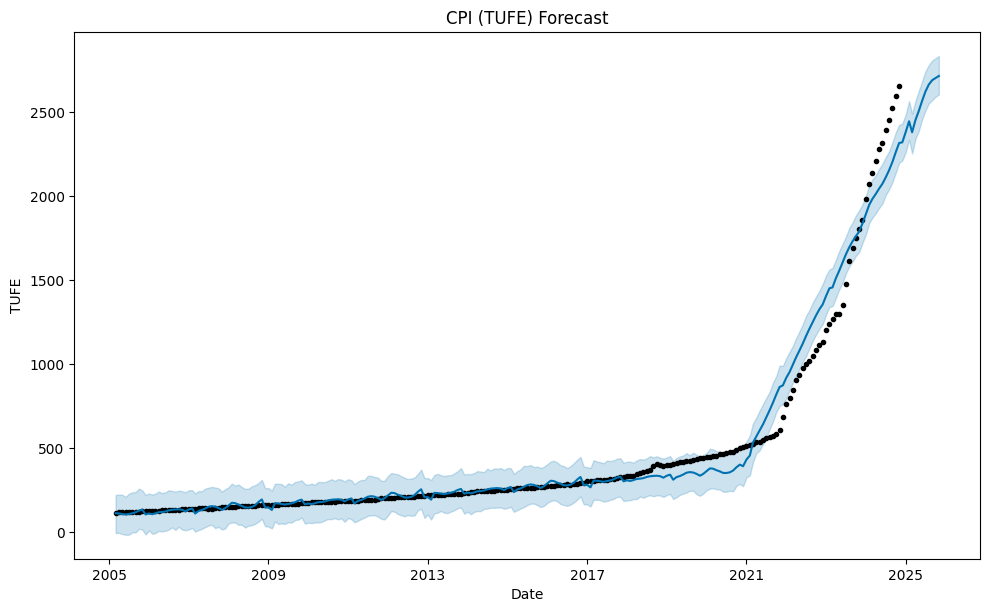


=== Analysis and Reporting ===

Brent Price (TRY) Forecast Summary:
            ds         yhat   yhat_lower   yhat_upper
237 2024-11-30  2823.476401  2674.961013  2975.362900
238 2024-12-31  2926.507804  2770.477905  3089.223785
239 2025-01-31  3019.973064  2871.925721  3162.704823
240 2025-02-28  3002.852490  2856.379412  3145.868378
241 2025-03-31  3077.223631  2933.391138  3233.478040
242 2025-04-30  3105.078183  2955.881191  3258.896658
243 2025-05-31  3178.814221  3017.029253  3323.205861
244 2025-06-30  3270.474257  3123.491306  3420.504544
245 2025-07-31  3280.635482  3143.551337  3430.238935
246 2025-08-31  3347.414737  3191.713505  3480.094095
247 2025-09-30  3362.681845  3216.907646  3519.767796
248 2025-10-31  3372.153052  3229.625237  3518.816533

CPI (TUFE) Forecast Summary:
            ds         yhat   yhat_lower   yhat_upper
237 2024-11-30  2321.273862  2212.635356  2432.408645
238 2024-12-31  2382.083445  2262.060695  2486.463106
239 2025-01-31  2446.823681  2336.541

In [2]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from prophet import Prophet
import matplotlib.pyplot as plt
import logging

# Suppress cmdstanpy logs
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)

# Load the Excel file
file_path = 'BRENT_TUFE_DATA.xlsx'  # Update with your file path
data = pd.read_excel(file_path)

# Display initial data
print("Column Names:\n", data.columns)
print("\nFirst 5 Rows:\n", data.head())

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by='Date', inplace=True)

# Calculate Brent Price in TRY dynamically
data['Brent_Price_Try'] = data['BRENT PRICE (USD)'] * (data['USDTRY'] / 10000)

# Display transformed data
print("\nTransformed Data (First 5 Rows):\n", data[['Date', 'BRENT PRICE (USD)', 'USDTRY', 'Brent_Price_Try']].head())

# Correlation analysis
correlation = data['Brent_Price_Try'].corr(data['TUFE'])
print(f"\nCorrelation between Brent Price (TRY) and TUFE: {correlation}")

# ADF Test function
def adf_test(series, title):
    print(f"\nADF Test for {title}:")
    adf_result = adfuller(series)
    print(f"ADF Statistic: {adf_result[0]}")
    print(f"p-value: {adf_result[1]}")
    print(f"Critical Values: {adf_result[4]}")

# Perform ADF tests
adf_test(data['Brent_Price_Try'], "Brent Price (TRY)")
adf_test(data['TUFE'], "TUFE")

# Differencing for stationarity
data['Brent_Price_Try_Diff2'] = data['Brent_Price_Try'].diff().diff()
data['TUFE_Diff2'] = data['TUFE'].diff().diff()

# Drop missing values after differencing
data.dropna(inplace=True)

# ADF Test for differenced series
adf_test(data['Brent_Price_Try_Diff2'], "Second Differenced Brent Price (TRY)")
adf_test(data['TUFE_Diff2'], "Second Differenced TUFE")

# Granger Causality Test
print("\nGranger Causality Test Results:")
grangercausalitytests(data[['Brent_Price_Try_Diff2', 'TUFE_Diff2']], maxlag=4, verbose=True)

# Prepare data for Prophet
df_brent = data[['Date', 'Brent_Price_Try']].rename(columns={'Date': 'ds', 'Brent_Price_Try': 'y'})
df_tufe = data[['Date', 'TUFE']].rename(columns={'Date': 'ds', 'TUFE': 'y'})

# Prophet model for Brent Price
model_brent = Prophet(weekly_seasonality=False, daily_seasonality=False)
model_brent.fit(df_brent)
future_brent = model_brent.make_future_dataframe(periods=12, freq='ME')
forecast_brent = model_brent.predict(future_brent)

# Visualize Brent Price predictions
plt.figure(figsize=(10, 6))
model_brent.plot(forecast_brent)
plt.title('Brent Price (TRY) Forecast')
plt.xlabel('Date')
plt.ylabel('Price (TRY)')
plt.grid()
plt.show()

# Prophet model for TUFE
model_tufe = Prophet(weekly_seasonality=False, daily_seasonality=False)
model_tufe.fit(df_tufe)
future_tufe = model_tufe.make_future_dataframe(periods=12, freq='ME')
forecast_tufe = model_tufe.predict(future_tufe)

# Visualize TUFE predictions
plt.figure(figsize=(10, 6))
model_tufe.plot(forecast_tufe)
plt.title('CPI (TUFE) Forecast')
plt.xlabel('Date')
plt.ylabel('TUFE')
plt.grid()
plt.show()

# 5. Analysis and Reporting
print("\n=== Analysis and Reporting ===")
print("\nBrent Price (TRY) Forecast Summary:")
print(forecast_brent[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))

print("\nCPI (TUFE) Forecast Summary:")
print(forecast_tufe[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))